<a href="https://colab.research.google.com/github/KolipakaRamesh/AIML_Practice_Excercises/blob/main/Classification_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reasoning**:
Generate a synthetic dataset for logistic regression using `make_classification` and store it in a pandas DataFrame and Series.



In [1]:
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

df_data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
s_labels = pd.Series(y, name='Label')

print("Features (X) head:")
display(df_data.head())
print("\nLabels (y) head:")
display(s_labels.head())

Features (X) head:


,Feature 1,Feature 2
0,0.601034,1.535353
1,0.755945,-1.172352
2,1.354479,-0.948528
3,3.103090,0.233485
4,0.753178,0.787514



Labels (y) head:


,Label
0,1
1,0
2,0
3,0
4,1


**Reasoning**:
Split the data into training and testing sets and print their shapes.



In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, s_labels, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 2)
Shape of X_test: (200, 2)
Shape of y_train: (800,)
Shape of y_test: (200,)


**Reasoning**:
Build and train a logistic regression model on the training data as instructed.



In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Reasoning**:
Evaluate the trained model on the testing data by calculating accuracy, precision, recall, and F1-score.



In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9000
Precision: 0.9222
Recall: 0.8646
F1-score: 0.8925


**Reasoning**:
Visualize the decision boundary of the logistic regression model using a meshgrid and contour plot, overlaying the training data.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


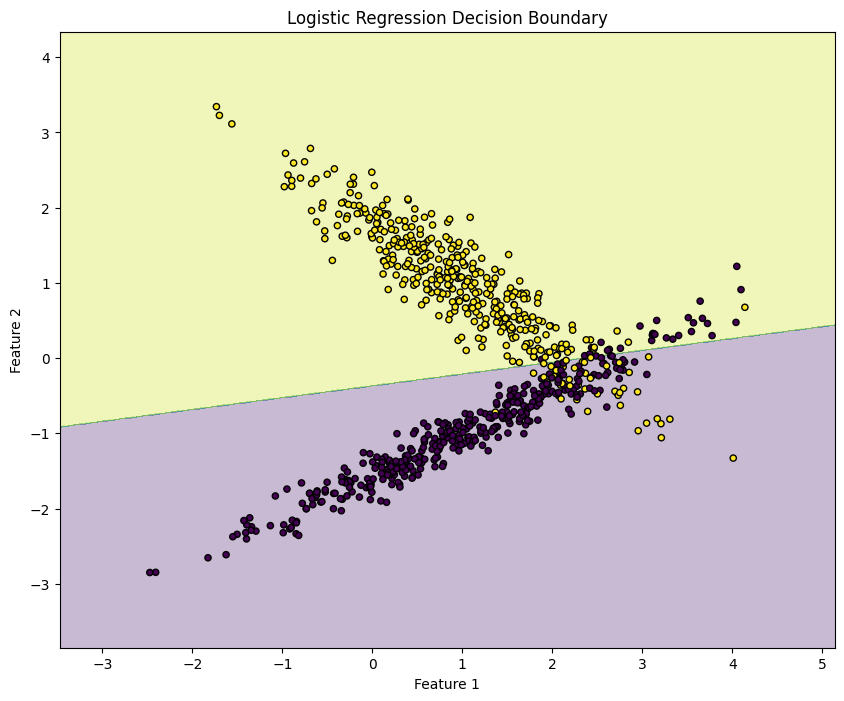

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid
x_min, x_max = X_train['Feature 1'].min() - 1, X_train['Feature 1'].max() + 1
y_min, y_max = X_train['Feature 2'].min() - 1, X_train['Feature 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the contour plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Create the scatter plot of training data
plt.scatter(X_train['Feature 1'], X_train['Feature 2'], c=y_train, cmap='viridis', edgecolors='k', s=20)

# Add title and labels
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings
*   A synthetic dataset with 1000 samples and 2 features was successfully generated for logistic regression.
*   The dataset was split into training (800 samples) and testing (200 samples) sets.
*   A logistic regression model was built and trained on the training data.
*   The trained model achieved an accuracy of 0.9000, precision of 0.9222, recall of 0.8646, and an F1-score of 0.8925 on the testing data.
*   The decision boundary of the logistic regression model was successfully visualized, showing the separation learned by the model in the 2D feature space.

### Insights or Next Steps
*   The model demonstrates good performance based on the evaluation metrics, indicating it learned to separate the classes effectively on the synthetic data.
*   For real-world applications, further analysis could involve exploring different feature engineering techniques or trying other classification algorithms to compare performance.


**Reasoning**:
Visualize the testing data with predicted labels to see how the model performed on unseen data.

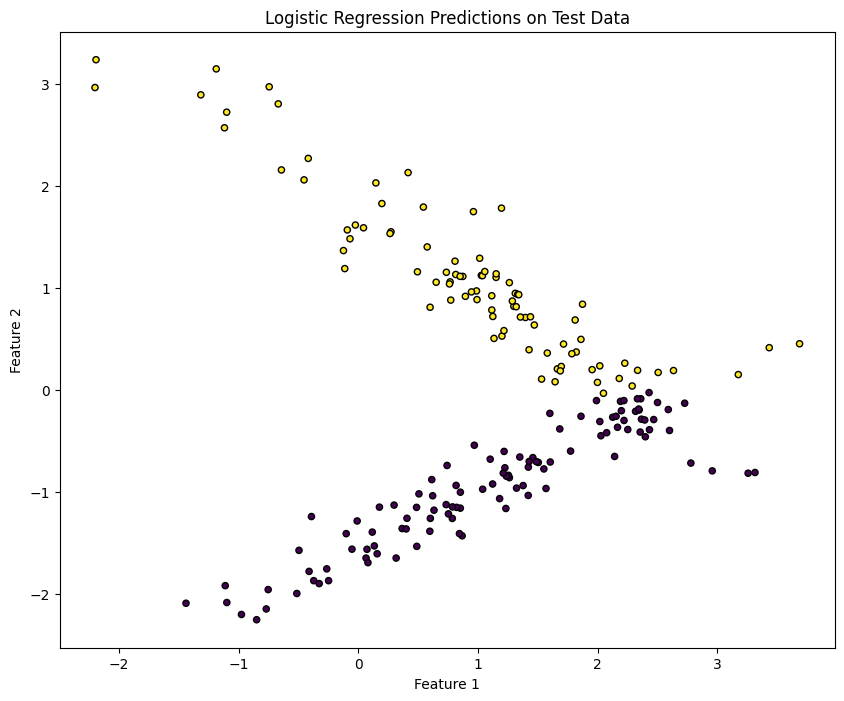

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test['Feature 1'], X_test['Feature 2'], c=y_pred, cmap='viridis', edgecolors='k', s=20)

plt.title('Logistic Regression Predictions on Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Reasoning**:
Calculate and display the confusion matrix to further evaluate the model's performance.

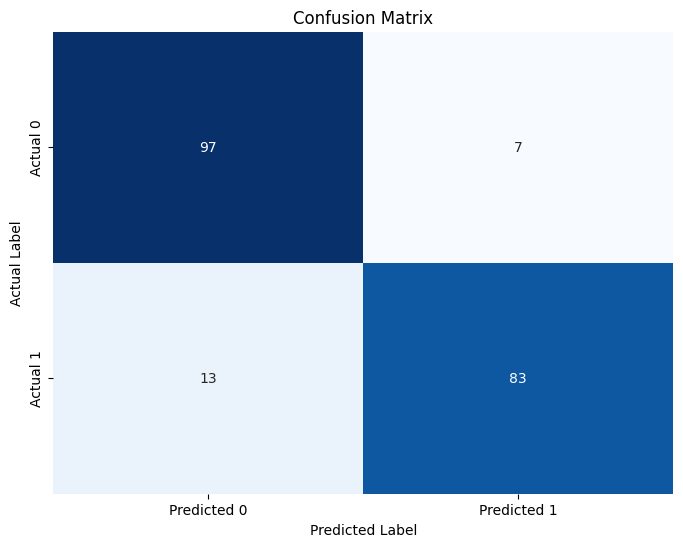

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()